1. –ü—Ä–æ–≤–µ–¥–∏—Ç–µ –∞–Ω–∞–ª–∏–∑ —Å –ø–æ–º–æ—â—å—é SSA –≤ –ª—é–±–æ–º –∏–∑ –≤—Ä–µ–º–µ–Ω–Ω—ã—Ö —Ä—è–¥–æ–≤ —Å –ø–µ—Ä–≤–æ–≥–æ –∑–∞–Ω—è—Ç–∏—è.

2. –ü—Ä–∏ –∂–µ–ª–∞–Ω–∏–∏ –º–æ–∂–µ—Ç–µ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —Å–≤–æ–∏–º –≤—Ä–µ–º–µ–Ω–Ω—ã–º —Ä—è–¥–æ–º ‚Äî —Ä–∞–±–æ—Ç–∞, Kaggle –∏ —Ç. –¥.

3. –ü–æ—Å–º–æ—Ç—Ä–∏—Ç–µ –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã —Å —Ä–∞–∑–Ω—ã–º–∏ –¥–ª–∏–Ω–∞–º–∏ –æ–∫–æ–Ω.

4. –û–±—è–∑–∞—Ç–µ–ª—å–Ω–æ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ –º–∞—Ç–µ—Ä–∏–∞–ª—É —Å –∑–∞–Ω—è—Ç–∏—è.

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import pandas as pd

# Fiddle with figure settings here:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 14
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams['axes.linewidth'] = 2
# Set the default colour cycle (in case someone changes it...)
from cycler import cycler
cols = plt.get_cmap('tab10').colors
plt.rcParams['axes.prop_cycle'] = cycler(color=cols)

import io, pickle, zipfile
from zipfile import ZipFile

import warnings
warnings.filterwarnings("ignore")

# A simple little 2D matrix plotter, excluding x and y labels.
def plot_2d(m, title=""):
    plt.imshow(m)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)

In [2]:
with ZipFile('Series.zip', 'r') as myzip:
    for item in myzip.infolist():
        print(f'File Name: {item.filename} ')

File Name: international-airline-passengers.csv 
File Name: mean-monthly-air-temperature-deg.csv 
File Name: monthly-boston-armed-robberies-j.csv 
File Name: monthly-sales-of-company-x-jan-6.csv 
File Name: weekly-closings-of-the-dowjones-.csv 
File Name: daily-total-female-births-in-cal.csv 


In [3]:
with ZipFile('Series.zip', 'r') as myzip:
    myzip.extractall()
    
df = pd.read_csv('international-airline-passengers.csv')   # –¥–ª—è –º–æ–¥–µ–ª–∏ ARIMA 
int_air_pass = pd.read_csv('international-airline-passengers.csv').iloc[:, 1]  
F = pd.read_csv('international-airline-passengers.csv').iloc[:, 1]

In [4]:
F

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Count, Length: 144, dtype: int64

In [5]:
type(F)

pandas.core.series.Series

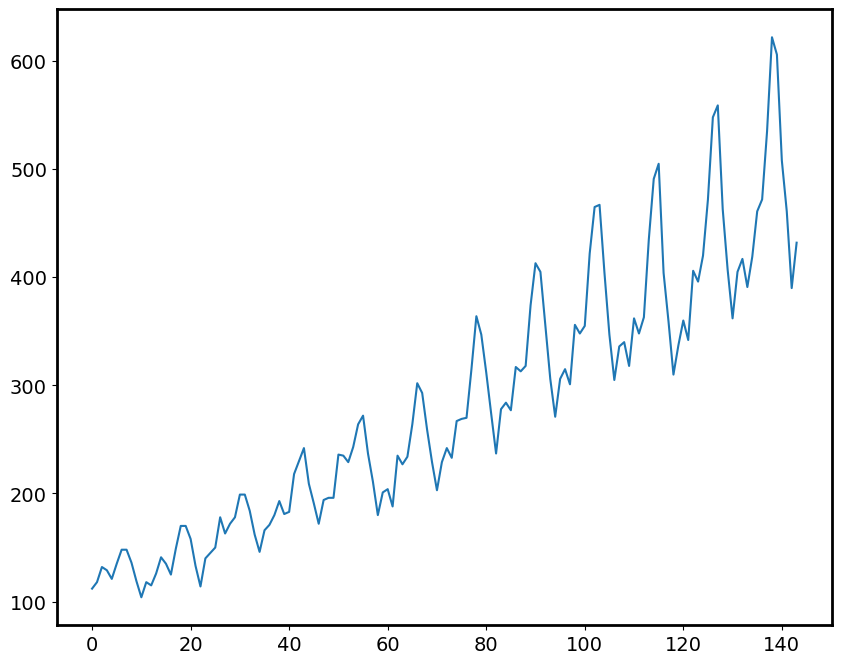

In [6]:
plt.plot(F)

In [7]:
F = F.values

In [8]:
F

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

In [9]:
L = 50 # The window length.
N = len(F)
K = N - L + 1 # The number of columns in the trajectory matrix.

# Create the trajectory matrix by pulling the relevant subseries of F, and stacking them as columns.
X = np.column_stack([F[i:i+L] for i in range(0, K)])

# Note: the i+L above gives us up to i+L-1, as numpy array upper bounds are exclusive. 

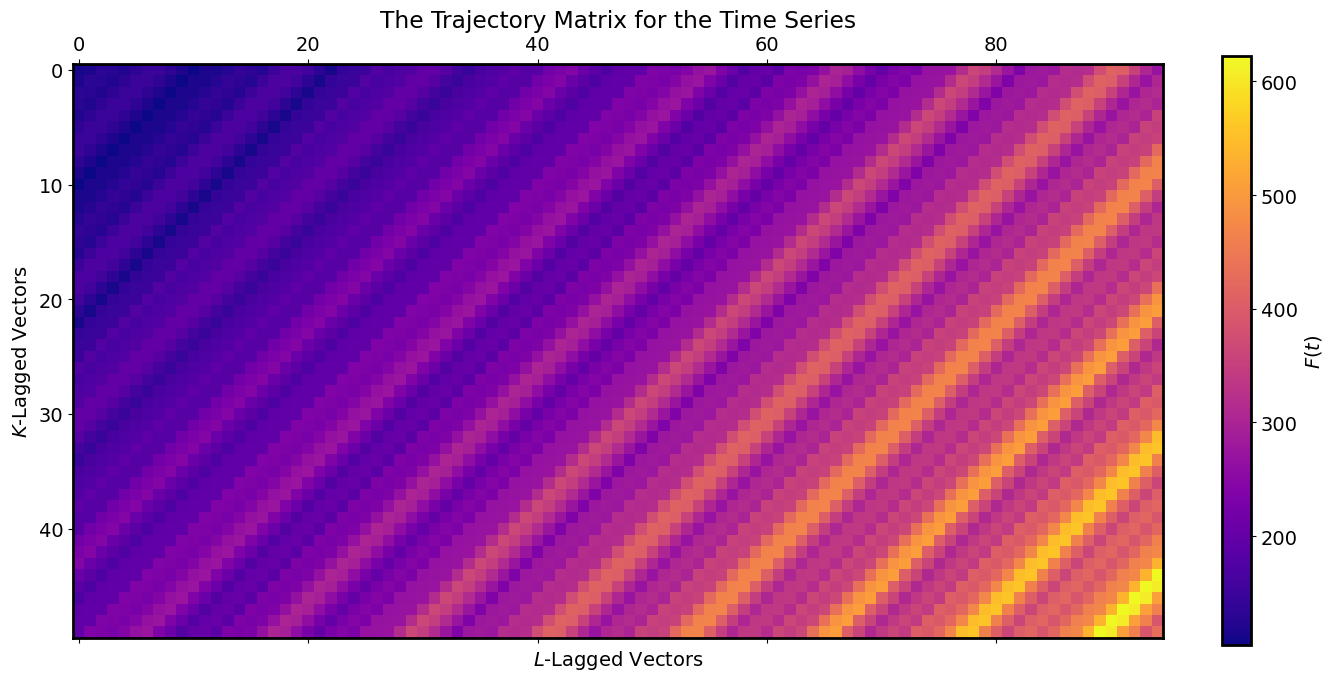

In [10]:
ax = plt.matshow(X)
plt.xlabel("$L$-Lagged Vectors")
plt.ylabel("$K$-Lagged Vectors")
plt.colorbar(ax.colorbar, fraction=0.025)
ax.colorbar.set_label("$F(t)$")
plt.title("The Trajectory Matrix for the Time Series");

In [11]:
d = np.linalg.matrix_rank(X) # The intrinsic dimensionality of the trajectory space.

# For those interested in how to code up an SVD calculation, Numerical Recipes in Fortran 77
# has you covered: http://www.aip.de/groups/soe/local/numres/bookfpdf/f2-6.pdf
# Thankfully, we'll leave the actual SVD calculation to NumPy.
U, Sigma, V = np.linalg.svd(X)
V = V.T # Note: the SVD routine returns V^T, not V, so I'll tranpose it back here. This may seem pointless, 
# but I'll treat the Python representation of V consistently with the mathematical notation in this notebook.

# Calculate the elementary matrices of X, storing them in a multidimensional NumPy array.
# This requires calculating sigma_i * U_i * (V_i)^T for each i, or sigma_i * outer_product(U_i, V_i). 
# Note that Sigma is a 1D array of singular values, instead of the full L x K diagonal matrix.
X_elem = np.array( [Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0,d)] )

# Quick sanity check: the sum of all elementary matrices in X_elm should be equal to X, to within a 
# *very small* tolerance:
if not np.allclose(X, X_elem.sum(axis=0), atol=1e-10):
    print("WARNING: The sum of X's elementary matrices is not equal to X!")

–†–∞–∑–ª–æ–∂–µ–Ω–∏–µ –∞–Ω—Ç–∏–¥–∏–∞–≥–æ–Ω–∞–ª—å–Ω–æ–π –º–∞—Ç—Ä–∏—Ü—ã –Ω–∞ —ç–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω—ã–µ –º–∞—Ç—Ä–∏—Ü—ã

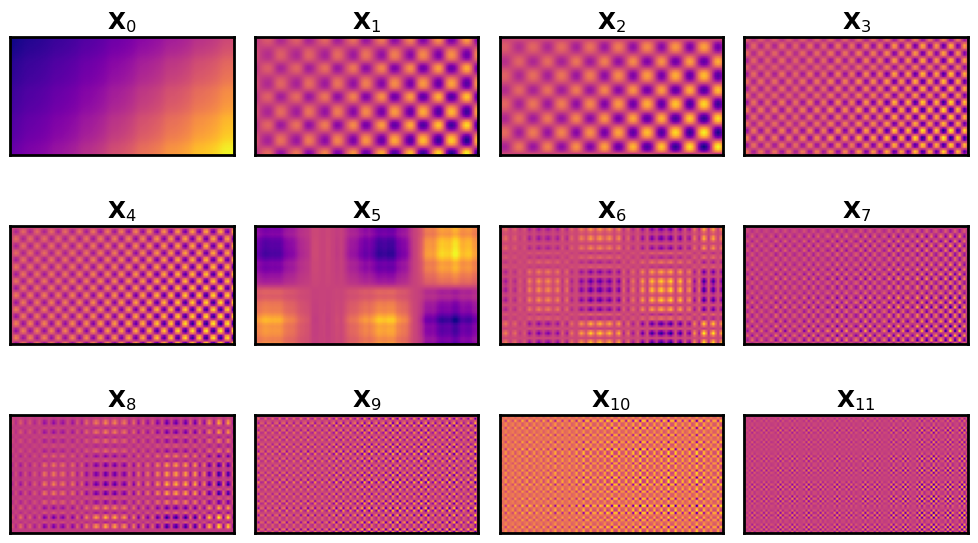

In [12]:
n = min(12, d) # In case d is less than 12 for the toy series. Say, if we were to exclude the noise component...
for i in range(n):
    plt.subplot(4, 4, i+1)
    title = "$\mathbf{X}_{" + str(i) + "}$"
    plot_2d(X_elem[i], title)
plt.tight_layout()

–•0 - –¢—Ä–µ–Ω–¥

1, 2, 3, 4, 6 –Ω–µ—á—Ç–æ –∏–º–µ—é—â–µ–µ –∫–æ–ª–µ–±–∞—Ç–µ–ª—å–Ω—ã–π —Ö–∞—Ä–∞–∫—Ç–µ—Ä

5 - –Ω–µ—á—Ç–æ –∏–º–µ—é—â–µ–µ 2 –º–∞–∫—Å–∏–º—É–º–∞ –∏ 3 –º–∏–Ω–∏–º—É–º–∞

7 - –ø–æ—Ö–æ–∂–µ –Ω–∞ —à—É–º

8 - –Ω–µ—á—Ç–æ –∑–∞—à—É–º–ª–µ–Ω–Ω–æ–µ(?), –Ω–æ –∏–º–µ—é—â–µ–µ –∏ –ø–µ—Ä–∏–æ–¥–∏—á–Ω–æ—Å—Ç—å

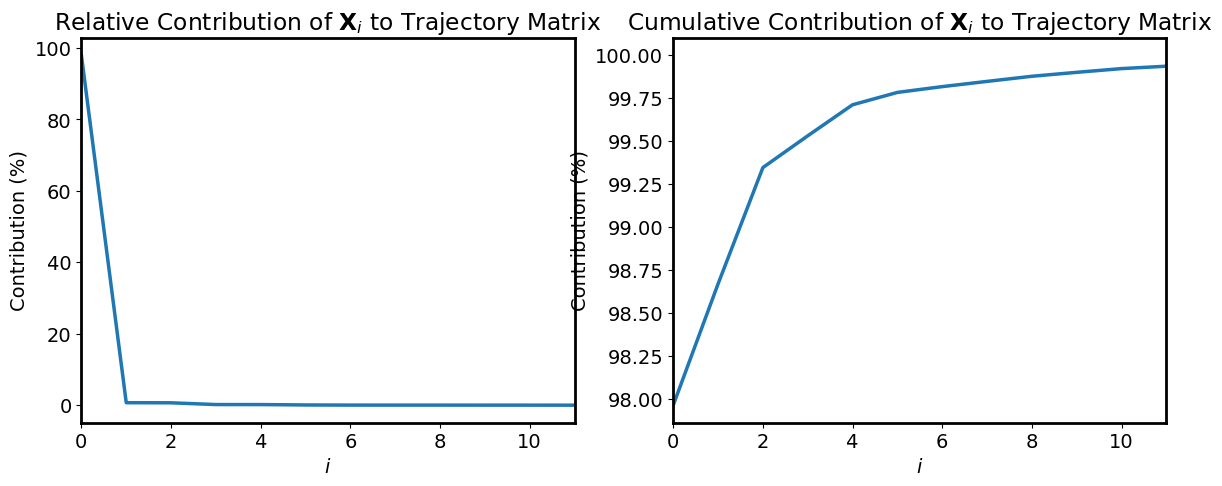

In [13]:
sigma_sumsq = (Sigma**2).sum()
fig, ax = plt.subplots(1, 2, figsize=(14,5))
ax[0].plot(Sigma**2 / sigma_sumsq * 100, lw=2.5)
ax[0].set_xlim(0,11)
ax[0].set_title("Relative Contribution of $\mathbf{X}_i$ to Trajectory Matrix")
ax[0].set_xlabel("$i$")
ax[0].set_ylabel("Contribution (%)")
ax[1].plot((Sigma**2).cumsum() / sigma_sumsq * 100, lw=2.5)
ax[1].set_xlim(0,11)
ax[1].set_title("Cumulative Contribution of $\mathbf{X}_i$ to Trajectory Matrix")
ax[1].set_xlabel("$i$")
ax[1].set_ylabel("Contribution (%)");

98 –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ –≤–∫–ª–∞–¥–∞ –∏–º–µ–µ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –•0

–ø–æ—Å–ª–µ–¥—É—é—â–∏–µ 7(?) –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø—Ä–∏–≤–Ω–æ—Å—è—Ç –æ—Å—Ç–∞–≤—à–∏–µ—Å—è 2 –ø—Ä–æ—Ü–µ–Ω—Ç–∞

In [14]:
def Hankelise(X):
    """
    Hankelises the matrix X, returning H(X).
    """
    L, K = X.shape
    transpose = False
    if L > K:
        # The Hankelisation below only works for matrices where L < K.
        # To Hankelise a L > K matrix, first swap L and K and tranpose X.
        # Set flag for HX to be transposed before returning. 
        X = X.T
        L, K = K, L
        transpose = True

    HX = np.zeros((L, K))
    
    # I know this isn't very efficient...
    for m in range(L):
        for n in range(K):
            s = m + n
            if 0 <= s <= L-1:
                for l in range(0, s + 1):
                    HX[m, n] += 1/(s + 1)*X[l, s - l]    
            elif L <= s <= K - 1:
                for l in range(0, L - 1):
                    HX[m,n] += 1/L*X[l, s-l]
            elif K <= s <= K+L-2:
                for l in range(s - K + 1, L):
                    HX[m,n] += 1/(K + L - s - 1)*X[l, s-l]
    if transpose:
        return HX.T
    else:
        return HX

–ì–∞–Ω–∫–µ–ª–∏–∑–∞—Ü–∏—è —ç–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω—ã—Ö –º–∞—Ç—Ä–∏—Ü

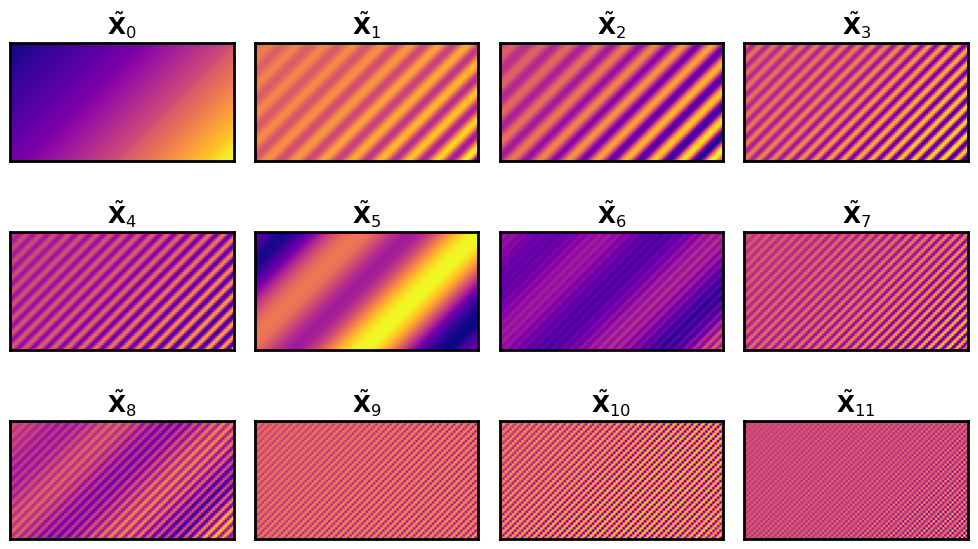

In [15]:
n = min(d, 12)
for j in range(0, n):
    plt.subplot(4, 4, j + 1)
    title = r"$\tilde{\mathbf{X}}_{" + str(j) + "}$"
    plot_2d(Hankelise(X_elem[j]), title)
plt.tight_layout() 

In [16]:
def X_to_TS(X_i):
    """Averages the anti-diagonals of the given elementary matrix, X_i, and returns a time series."""
    # Reverse the column ordering of X_i
    X_rev = X_i[::-1]
    # Full credit to Mark Tolonen at https://stackoverflow.com/a/6313414 for this one:
    return np.array([X_rev.diagonal(i).mean() for i in range(-X_i.shape[0]+1, X_i.shape[1])])

–ø–æ—Å—Ç—Ä–æ–∏–º –ø–µ—Ä–≤—ã–µ 12 —ç–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω—ã—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–æ–≤,  ùêπÃÉ ùëñ
 

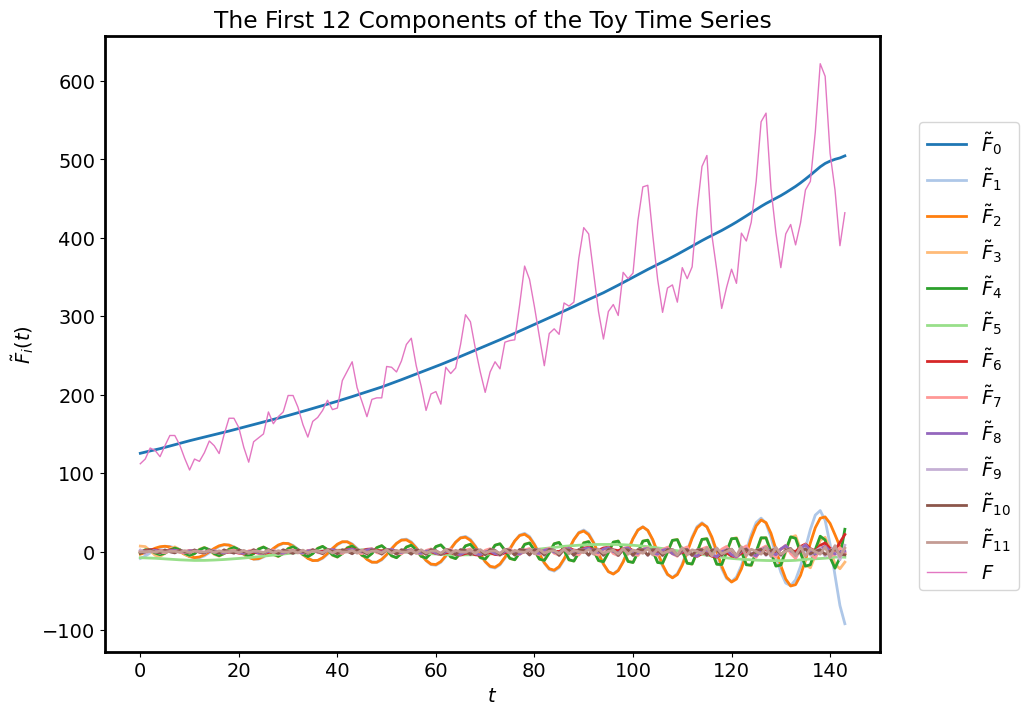

In [17]:
n = min(12,d) # In case of noiseless time series with d < 12.

# Fiddle with colour cycle - need more colours!
fig = plt.subplot()
color_cycle = cycler(color=plt.get_cmap('tab20').colors)
fig.axes.set_prop_cycle(color_cycle)

# Convert elementary matrices straight to a time series - no need to construct any Hankel matrices.
for i in range(n):
    F_i = X_to_TS(X_elem[i])
    fig.axes.plot(F_i, lw=2)

fig.axes.plot(F, alpha=1, lw=1)
fig.set_xlabel("$t$")
fig.set_ylabel(r"$\tilde{F}_i(t)$")
legend = [r"$\tilde{F}_{%s}$" %i for i in range(n)] + ["$F$"]
fig.set_title("The First 12 Components of the Toy Time Series")
fig.legend(legend, loc=(1.05,0.1));

–ü–æ–ø—Ä–æ–±—É—é —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞—Ç—å –∫–æ–º–ø–æ–Ω–µ–Ω—Ç—ã —Ä—è–¥–∞, –ø—Ä–æ—è–≤–∏–≤ —Å–≤–æ–∏ "–º–æ—â–Ω—ã–µ" –≤–∏–∑—É–∞–ª—å–Ω–æ-–∞–Ω–∞–ª–∏—Ç–∏—á–µ—Å–∫–∏–µ —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏)

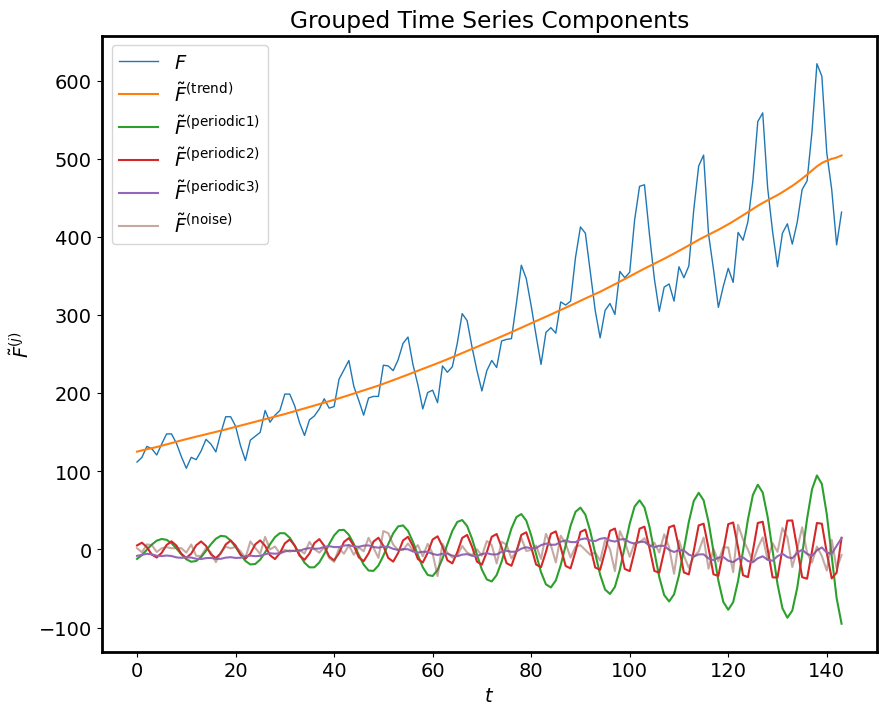

In [36]:
# Assemble the grouped components of the time series.
F_trend = X_to_TS(X_elem[[0]].sum(axis=0))
F_periodic1 = X_to_TS(X_elem[[1,2]].sum(axis=0))
F_periodic2 = X_to_TS(X_elem[[3,4]].sum(axis=0))
F_periodic3 = X_to_TS(X_elem[[5,6]].sum(axis=0))

F_noise = X_to_TS(X_elem[7:].sum(axis=0))

# Plot the toy time series and its separated components on a single plot.
plt.plot(F, lw=1)
plt.plot(F_trend)
plt.plot(F_periodic1)
plt.plot(F_periodic2)
plt.plot(F_periodic3)
plt.plot(F_noise, alpha=0.5)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}^{(j)}$")
groups = ["trend", "periodic 1", "periodic 2", "periodic 3", "noise"]
legend = ["$F$"] + [r"$\tilde{F}^{(\mathrm{%s})}$"%group for group in groups]
plt.legend(legend)
plt.title("Grouped Time Series Components")
plt.show()

# A list of tuples so we can create the next plot with a loop.
components = [("Trend", F_trend), 
              ("Periodic 1", F_periodic1),
              ("Periodic 2", F_periodic2),
              ("Periodic 3", F_periodic3),
              ("Noise", F_noise)]



–ü–æ—Å—Ç—Ä–æ–∏–º w-–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É –¥–ª—è –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞

In [37]:
# Get the weights w first, as they'll be reused a lot.
# Note: list(np.arange(L)+1) returns the sequence 1 to L (first line in definition of w), 
# [L]*(K-L-1) repeats L K-L-1 times (second line in w definition)
# list(np.arange(L)+1)[::-1] reverses the first list (equivalent to the third line)
# Add all the lists together and we have our array of weights.
w = np.array(list(np.arange(L)+1) + [L]*(K-L-1) + list(np.arange(L)+1)[::-1])

# Get all the components of the toy series, store them as columns in F_elem array.
F_elem = np.array([X_to_TS(X_elem[i]) for i in range(d)])

# Calculate the individual weighted norms, ||F_i||_w, first, then take inverse square-root so we don't have to later.
F_wnorms = np.array([w.dot(F_elem[i]**2) for i in range(d)])
F_wnorms = F_wnorms**-0.5

# Calculate the w-corr matrix. The diagonal elements are equal to 1, so we can start with an identity matrix
# and iterate over all pairs of i's and j's (i != j), noting that Wij = Wji.
Wcorr = np.identity(d)
for i in range(d):
    for j in range(i+1,d):
        Wcorr[i,j] = abs(w.dot(F_elem[i]*F_elem[j]) * F_wnorms[i] * F_wnorms[j])
        Wcorr[j,i] = Wcorr[i,j]

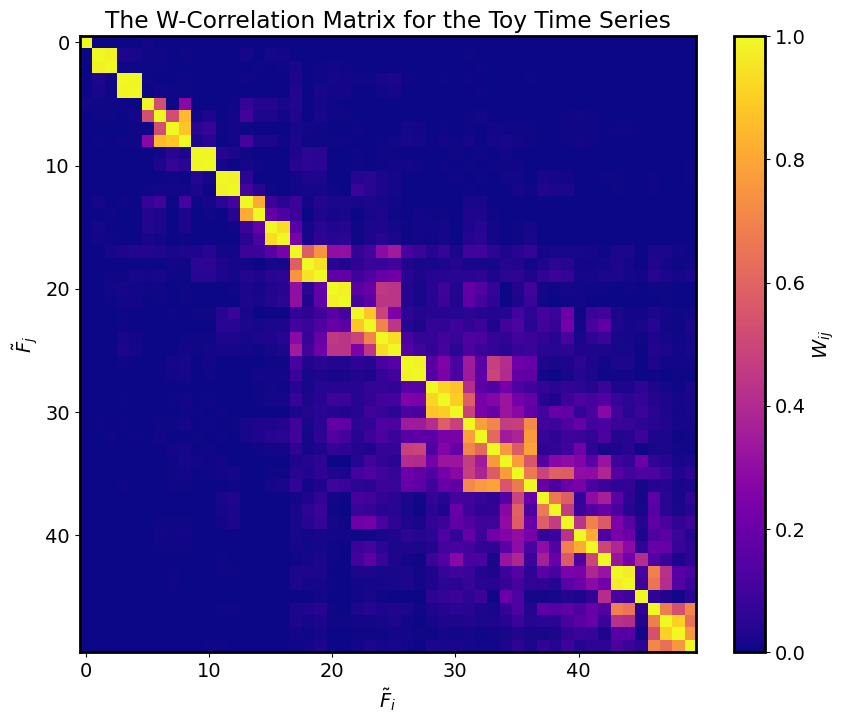

In [47]:
ax = plt.imshow(Wcorr)
plt.xlabel(r"$\tilde{F}_i$")
plt.ylabel(r"$\tilde{F}_j$")
plt.colorbar(ax.colorbar, fraction=0.045)
ax.colorbar.set_label("$W_{ij}$")
plt.clim(0,1)
plt.title("The W-Correlation Matrix for the Toy Time Series");

–ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ –ø–µ—Ä–≤—ã—Ö 10 –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–æ–≤ –≤  ùêñcorr
 

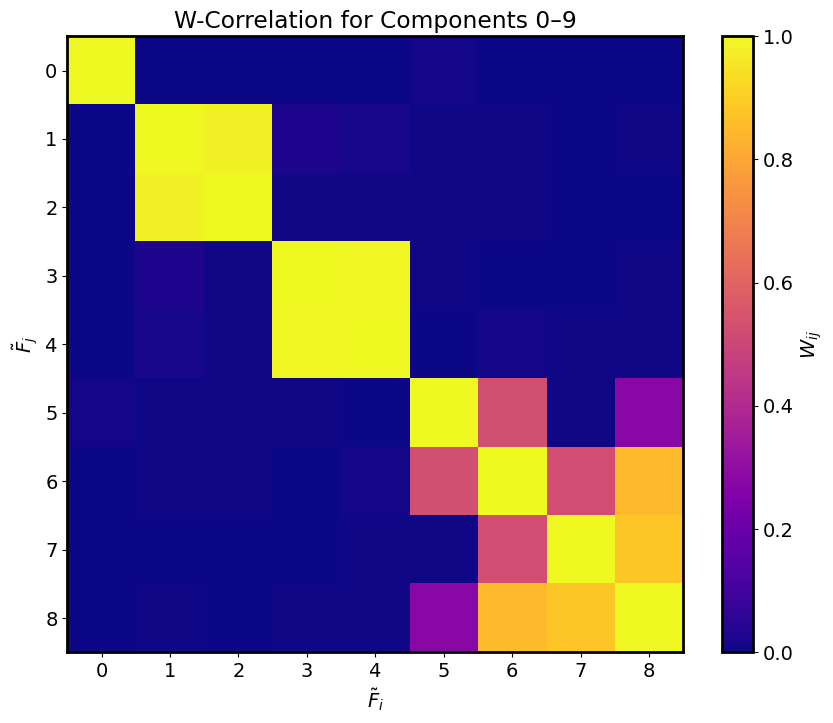

In [42]:
ax = plt.imshow(Wcorr)
plt.xlabel(r"$\tilde{F}_i$")
plt.ylabel(r"$\tilde{F}_j$")
plt.colorbar(ax.colorbar, fraction=0.045)
ax.colorbar.set_label("$W_{ij}$")
plt.xlim(-0.5,8.5)
plt.ylim(8.5,-0.5)
plt.clim(0,1)
plt.title(r"W-Correlation for Components 0‚Äì9");

–≤—ã—Å–æ–∫–æ—Å–∫–æ—Ä–µ–ª–ª–∏—Ä–æ–≤–∞–Ω—ã 1, 2  –∏ 3,4 

–Ω–µ–º–Ω–æ–≥–æ —Å–ª–∞–±–µ–µ 7,8 –∏ 6,8

7,6 —É–∂–µ –Ω–∞ –ø—Ä–µ–¥–µ–ª–µ (–ø—Ä–∏–º–µ—Ä–Ω–æ 0,5)

#### –ö–ª–∞—Å—Å Python –¥–ª—è SSA

In [43]:
class SSA(object):
    
    __supported_types = (pd.Series, np.ndarray, list)
    
    def __init__(self, tseries, L, save_mem=True):
        """
        Decomposes the given time series with a singular-spectrum analysis. Assumes the values of the time series are
        recorded at equal intervals.
        
        Parameters
        ----------
        tseries : The original time series, in the form of a Pandas Series, NumPy array or list. 
        L : The window length. Must be an integer 2 <= L <= N/2, where N is the length of the time series.
        save_mem : Conserve memory by not retaining the elementary matrices. Recommended for long time series with
            thousands of values. Defaults to True.
        
        Note: Even if an NumPy array or list is used for the initial time series, all time series returned will be
        in the form of a Pandas Series or DataFrame object.
        """
        
        # Tedious type-checking for the initial time series
        if not isinstance(tseries, self.__supported_types):
            raise TypeError("Unsupported time series object. Try Pandas Series, NumPy array or list.")
        
        # Checks to save us from ourselves
        self.N = len(tseries)
        if not 2 <= L <= self.N/2:
            raise ValueError("The window length must be in the interval [2, N/2].")
        
        self.L = L
        self.orig_TS = pd.Series(tseries)
        self.K = self.N - self.L + 1
        
        # Embed the time series in a trajectory matrix
        self.X = np.array([self.orig_TS.values[i:L+i] for i in range(0, self.K)]).T
        
        # Decompose the trajectory matrix
        self.U, self.Sigma, VT = np.linalg.svd(self.X)
        self.d = np.linalg.matrix_rank(self.X)
        
        self.TS_comps = np.zeros((self.N, self.d))
        
        if not save_mem:
            # Construct and save all the elementary matrices
            self.X_elem = np.array([ self.Sigma[i]*np.outer(self.U[:,i], VT[i,:]) for i in range(self.d) ])

            # Diagonally average the elementary matrices, store them as columns in array.           
            for i in range(self.d):
                X_rev = self.X_elem[i, ::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]
            
            self.V = VT.T
        else:
            # Reconstruct the elementary matrices without storing them
            for i in range(self.d):
                X_elem = self.Sigma[i]*np.outer(self.U[:,i], VT[i,:])
                X_rev = X_elem[::-1]
                self.TS_comps[:,i] = [X_rev.diagonal(j).mean() for j in range(-X_rev.shape[0]+1, X_rev.shape[1])]
            
            self.X_elem = "Re-run with save_mem=False to retain the elementary matrices."
            
            # The V array may also be very large under these circumstances, so we won't keep it.
            self.V = "Re-run with save_mem=False to retain the V matrix."
        
        # Calculate the w-correlation matrix.
        self.calc_wcorr()
            
    def components_to_df(self, n=0):
        """
        Returns all the time series components in a single Pandas DataFrame object.
        """
        if n > 0:
            n = min(n, self.d)
        else:
            n = self.d
        
        # Create list of columns - call them F0, F1, F2, ...
        cols = ["F{}".format(i) for i in range(n)]
        return pd.DataFrame(self.TS_comps[:, :n], columns=cols, index=self.orig_TS.index)
            
    
    def reconstruct(self, indices):
        """
        Reconstructs the time series from its elementary components, using the given indices. Returns a Pandas Series
        object with the reconstructed time series.
        
        Parameters
        ----------
        indices: An integer, list of integers or slice(n,m) object, representing the elementary components to sum.
        """
        if isinstance(indices, int): indices = [indices]
        
        ts_vals = self.TS_comps[:,indices].sum(axis=1)
        return pd.Series(ts_vals, index=self.orig_TS.index)
    
    def calc_wcorr(self):
        """
        Calculates the w-correlation matrix for the time series.
        """
             
        # Calculate the weights
        w = np.array(list(np.arange(self.L)+1) + [self.L]*(self.K-self.L-1) + list(np.arange(self.L)+1)[::-1])
        
        def w_inner(F_i, F_j):
            return w.dot(F_i*F_j)
        
        # Calculated weighted norms, ||F_i||_w, then invert.
        F_wnorms = np.array([w_inner(self.TS_comps[:,i], self.TS_comps[:,i]) for i in range(self.d)])
        F_wnorms = F_wnorms**-0.5
        
        # Calculate Wcorr.
        self.Wcorr = np.identity(self.d)
        for i in range(self.d):
            for j in range(i+1,self.d):
                self.Wcorr[i,j] = abs(w_inner(self.TS_comps[:,i], self.TS_comps[:,j]) * F_wnorms[i] * F_wnorms[j])
                self.Wcorr[j,i] = self.Wcorr[i,j]
    
    def plot_wcorr(self, min=None, max=None):
        """
        Plots the w-correlation matrix for the decomposed time series.
        """
        if min is None:
            min = 0
        if max is None:
            max = self.d
        
        if self.Wcorr is None:
            self.calc_wcorr()
        
        ax = plt.imshow(self.Wcorr)
        plt.xlabel(r"$\tilde{F}_i$")
        plt.ylabel(r"$\tilde{F}_j$")
        plt.colorbar(ax.colorbar, fraction=0.045)
        ax.colorbar.set_label("$W_{i,j}$")
        plt.clim(0,1)
        
        # For plotting purposes:
        if max == self.d:
            max_rnge = self.d-1
        else:
            max_rnge = max
        
        plt.xlim(min-0.5, max_rnge+0.5)
        plt.ylim(max_rnge+0.5, min-0.5)
        

–¢–µ–ø–µ—Ä—å –º—ã —Å–æ–∑–¥–∞–ª–∏ –º–µ—Ö–∞–Ω–∏–∑–º, –ø–æ–∑–≤–æ–ª—è—é—â–∏–π –ª–µ–≥–∫–æ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å –≤–ª–∏—è–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ –¥–ª–∏–Ω—ã –æ–∫–Ω–∞,

ùêø, –Ω–∞ –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—é –Ω–∞—à–µ–≥–æ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞

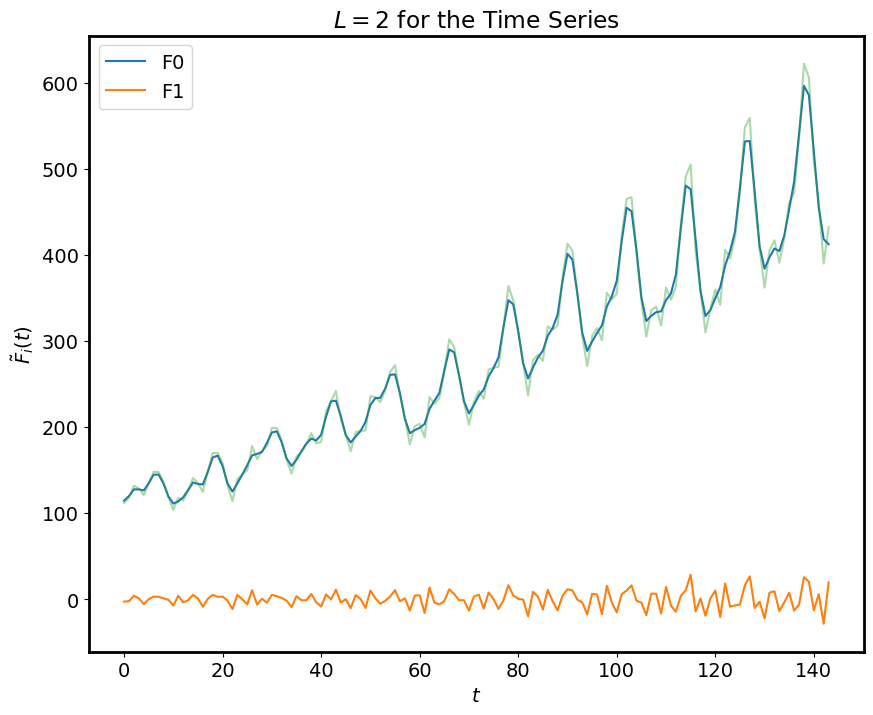

In [49]:
# L = 2 –¥–ª–∏–Ω–∞ –æ–∫–Ω–∞
F_ssa_L2 = SSA(F, 2)
F_ssa_L2.components_to_df().plot()
F_ssa_L2.orig_TS.plot(alpha=0.4)
plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title(r"$L=2$ for the Time Series");

–î–∞–∂–µ —Å —Ç–∞–∫–∏–º –º–∞–ª—ã–º –æ–∫–Ω–æ–º –º–æ–∂–Ω–æ –≤–∏–¥–µ—Ç—å, —á—Ç–æ –ø—Ä–æ–∏–∑–æ—à–ª–æ —Ä–∞–∑–ª–∏—á–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –æ—Ç —à—É–º–∞

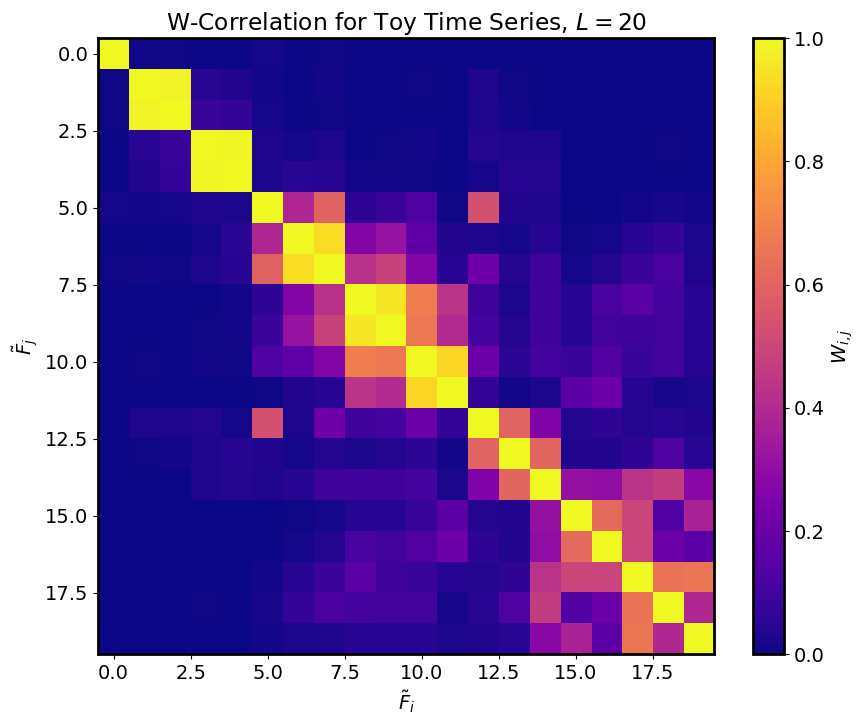

In [50]:
F_ssa_L20 = SSA(F, 20)
F_ssa_L20.plot_wcorr()
plt.title("W-Correlation for Toy Time Series, $L=20$");

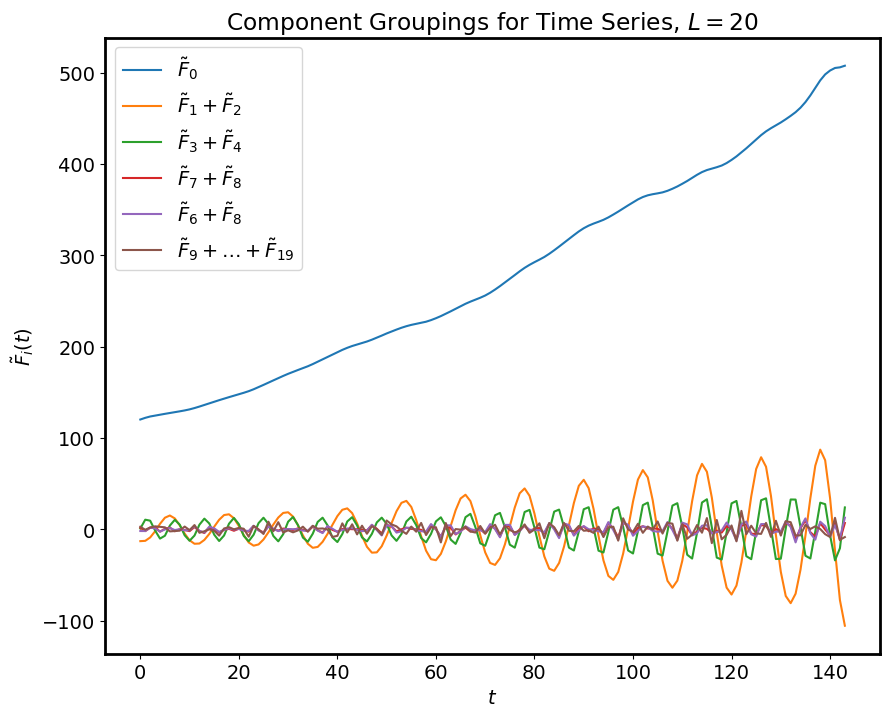

In [56]:
F_ssa_L20.reconstruct(0).plot()
F_ssa_L20.reconstruct([1,2]).plot()
F_ssa_L20.reconstruct([3,4]).plot()
F_ssa_L20.reconstruct([7,8]).plot()
F_ssa_L20.reconstruct([6,8]).plot()


F_ssa_L20.reconstruct(slice(9,20)).plot()

plt.xlabel("$t$")
plt.ylabel(r"$\tilde{F}_i(t)$")
plt.title("Component Groupings for Time Series, $L=20$");
plt.legend([r"$\tilde{F}_0$", 
            r"$\tilde{F}_1+\tilde{F}_2$",
            r"$\tilde{F}_3+\tilde{F}_4$",
            r"$\tilde{F}_7+\tilde{F}_8$",
            r"$\tilde{F}_6+\tilde{F}_8$",
            r"$\tilde{F}_9+ \ldots + \tilde{F}_{19}$"]);

–í—ã–≤–æ–¥:

–ü—Ä–∏ –¥–ª–∏–Ω–µ –æ–∫–Ω–∞ = 50 –∫—Ä–∏–≤–∞—è —Ç—Ä–µ–Ω–¥–∞ –±–æ–ª—å—à–µ –ø–æ—Ö–æ–∂–∞ –Ω–∞ –ø—Ä—è–º—É—é, —á–µ–º –ø—Ä–∏ –º–µ–Ω—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö.

–ö–æ–º–ø–æ–Ω–µ–Ω—Ç—ã, –æ—Ç–≤–µ—á–∞—é—â–∏–µ –∑–∞ –ø–µ—Ä–∏–æ–¥—ã, –±–æ–ª—å—à–µ –ø–æ—Ö–æ–∂–∏ –Ω–∞ —Å–∏–Ω—É—Å–æ–∏–¥–Ω—ã–µ —Å—É—â–Ω–æ—Å—Ç–∏ –∏ –∏—Ö —Ç—Ä–∏, —á—Ç–æ –∏ –≤–∏–¥–Ω–æ –∏–∑ 

–≥—Ä–∞—Ñ–∏–∫–∞ –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ —Ä—è–¥–∞. 

–ö–∞–∂–µ—Ç—Å—è, —á—Ç–æ –º–µ–Ω–µ–µ 50 –ø—Ä–∏–Ω–∏–º–∞—Ç—å –æ–∫–Ω–æ –¥–ª—è —Ä—è–¥–∞ —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —ç–ª–µ–º–µ–Ω—Ç–æ–≤ 144, —Å–º—ã—Å–ª–∞ –Ω–µ—Ç.
    

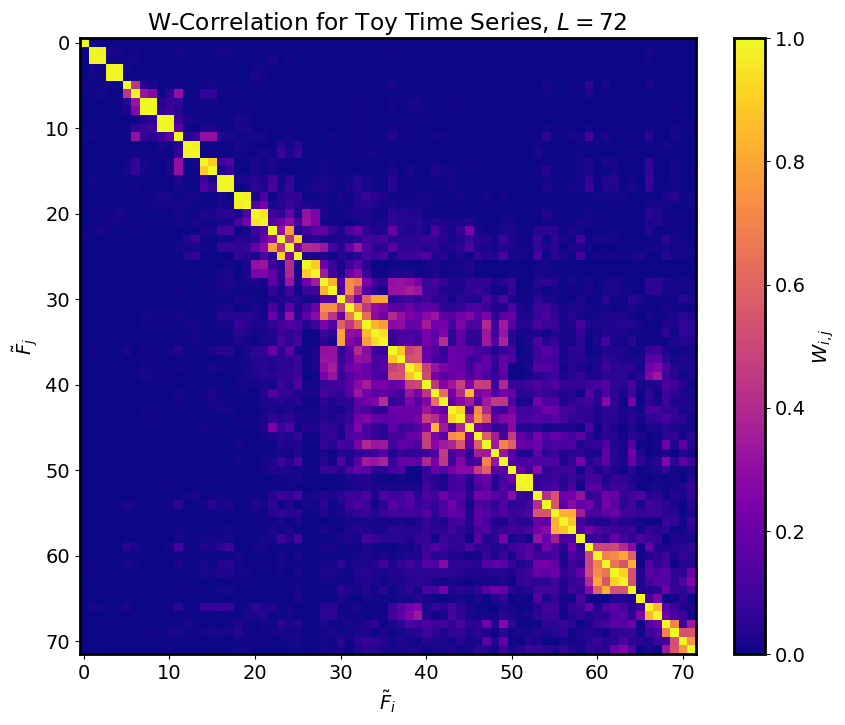

In [60]:
F_ssa_L72 = SSA(F, 72)
F_ssa_L72.plot_wcorr()
plt.title("W-Correlation for Toy Time Series, $L=72$");

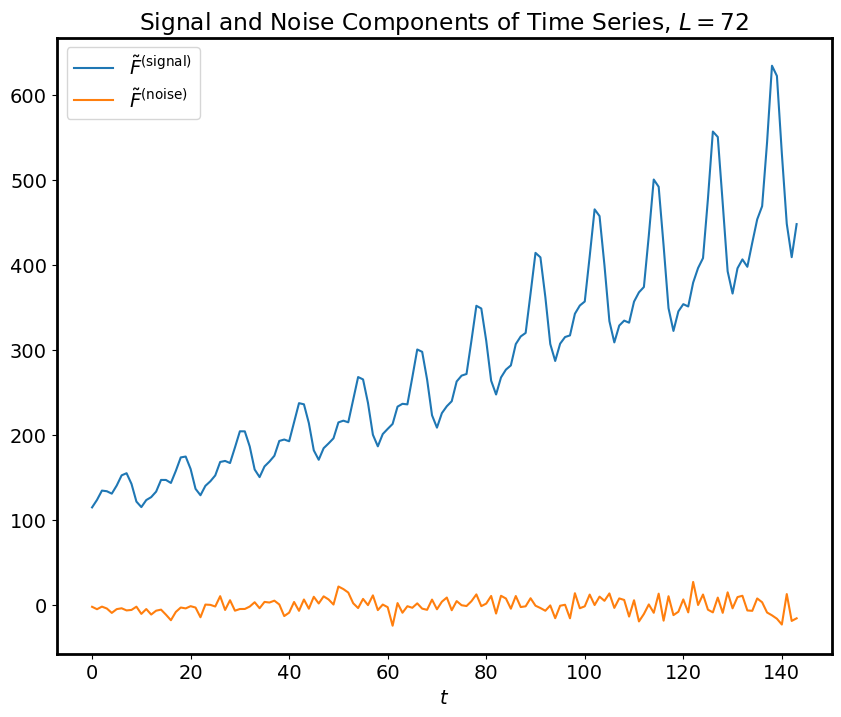

In [61]:
F_ssa_L72.reconstruct(slice(0,10)).plot()
F_ssa_L72.reconstruct(slice(10,72)).plot()
plt.legend([r"$\tilde{F}^{\mathrm{(signal)}}$", r"$\tilde{F}^{\mathrm{(noise)}}$"])
plt.title("Signal and Noise Components of Time Series, $L = 72$")
plt.xlabel(r"$t$");

–ü–æ—Å—Ç—Ä–æ—é –≥—Ä–∞—Ñ–∏–∫–∏ –≤—Å–µ—Ö –ø–µ—Ä–≤—ã—Ö –¥–µ—Å—è—Ç–∏ –∫–æ–º–ø–æ–Ω–µ–Ω—Ç

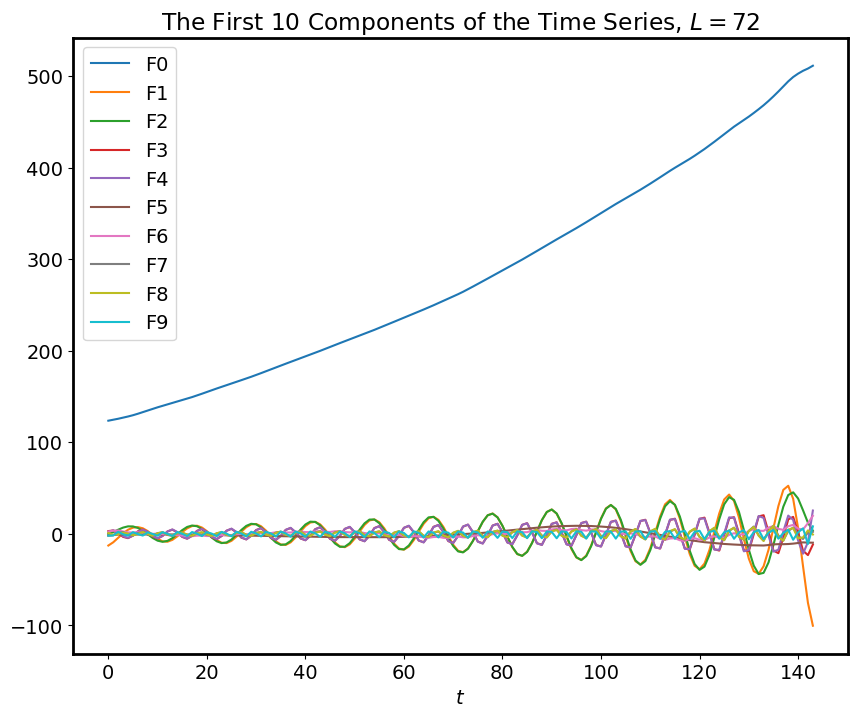

In [62]:
F_ssa_L72.components_to_df(n=10).plot()
plt.title(r"The First 10 Components of the Time Series, $L=72$")
plt.xlabel(r"$t$");

–ü—Ä–∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –≤–æ–∑–º–æ–∂–Ω–æ–π –¥–ª–∏–Ω–µ –æ–∫–Ω–∞, –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –≥—Ä–∞—Ñ–∏–∫–æ–≤ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –¥–ª–∏–Ω–æ–π = 50, —É—Ö—É–¥—à–∏–ª–∞—Å—å. 